<a href="https://colab.research.google.com/github/logsmay/inter-probe/blob/main/vc_dataengineer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Link to colab: https://colab.research.google.com/drive/1or5tjRAGnCJgNCmTrEUQahjOlbR04FJu#scrollTo=dac5iWJn8lTe

# Problem 1

Create a function called `vc_range` that takes into parameter an integer `n`.

This function will print the numbers from 0 to n.

There are some conditions, however:
 - For multiples of four, it should print "Vestiaire" instead of a number.
 - For multiples of seven, it should print "Collective"
 - For numbers which are multiples of both: the four and seven, it should print "VestiaireCollective"

Example :
```
>>> vc_range(30)
VestiaireCollective
1
2
3
Vestiaire
5
6
Collective
Vestiaire
9
10
11
Vestiaire
13
Collective
15
Vestiaire
17
18
19
Vestiaire
Collective
22
23
Vestiaire
25
26
27
VestiaireCollective
29
```

In [ ]:
var_1 = 'Vestiaire'
var_2 = 'Collective'
def vc_range(n):
  for x in range(n):
    if(x%4==0 and x%7==0):
      print(var_1+var_2)
    elif(x%4 == 0):
      print(var_1)
    elif(x%7 == 0):
      print(var_2)
    else:
      print(x)
vc_range(30)

VestiaireCollective
1
2
3
Vestiaire
5
6
Collective
Vestiaire
9
10
11
Vestiaire
13
Collective
15
Vestiaire
17
18
19
Vestiaire
Collective
22
23
Vestiaire
25
26
27
VestiaireCollective
29


# Problem 2

Create a class VcList that inherits from `list`.

The class should have an instance attribute `max_length` (a positive integer) that sets the maximal length of the list. If the attribute is set to a negative number, it should raise an Exception.

Overwrite all needed methods to prevent VcList objects from exceeding max_length. Exceptions should be raised if the user attempts to exceed this length.

In [ ]:
# Your solution
class VcListSizeExceedError(Exception):
    pass

class VcInvalidSizeError(Exception):
    pass
    
class VcList(list):
  def __init__(self, *args, **kwargs):
    self.max_length = kwargs.pop('max_length',0)
    if self.max_length > 0 :
      super(VcList, self).__init__(*args, **kwargs)
    else:
      raise VcInvalidSizeError()
  
  def _check_item_limit(self):
    if self.max_length and len(self) >= self.max_length:
      raise VcListSizeExceedError()
  
  def _check_list_size(self, L):
    if self.max_length and len(self) + len(L) > self.max_length:
      raise VcListSizeExceedError()
  
  def append(self, x):
    self._check_item_limit()
    return super(VcList, self).append(x)

  def insert(self, i, x):
    self._check_item_limit()
    return super(VcList, self).insert(i, x)

  def extend(self, L):
    self._check_list_size(L)
    return super(VcList, self).extend(L)
  
  def __add__(self, L):
    self._check_list_size(L)
    return super(VcList, self).__add__(L)

  def __iadd__(self, L):
    self._check_list_size(L)
    return super(VcList, self).__iadd__(L)

  

In [ ]:
vc_list_1 = VcList(max_length=10)
vc_list_1.extend([1,2,3,4,5,6,7,8,9,10])
print(vc_list_1)

vc_list_2 = VcList(max_length=10)
vc_list_2.extend([1,2,3,4,5])
vc_list_2.append(6)
vc_list_2.insert(7, 7)
vc_list_2 += [8,9]
vc_list_2 += [10]
print(vc_list_2)

# following fns raises exception if the size of the list already reached max_length
try:
  vc_list_2.append(11)
except VcListSizeExceedError as err:
  print('append error')

try:
  vc_list_2.insert(0, 11)
except VcListSizeExceedError as err:
  print('insert error')

try:
  vc_list_2.extend([11, 12])
except VcListSizeExceedError as err:
  print('extend error')

try:
  vc_list_2 += [11]
except VcListSizeExceedError as err:
  print('_iadd_ error')

print(vc_list_2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
append error
insert error
extend error
_iadd_ error
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
import unittest

class testVcList(unittest.TestCase):

  def test_sample(self):
    self.inst = VcList(max_length=10)
    self.inst.extend([1,2,3,4,5,6,7,8,9,10])
    self.assertEqual(self.inst.max_length, 10)
    self.assertIsInstance(self.inst, VcList)
    self.assertListEqual(self.inst, [1,2,3,4,5,6,7,8,9,10])
    self.inst[9]='a'
    self.assertListEqual(self.inst, [1,2,3,4,5,6,7,8,9,'a'])
    self.inst.clear()
    self.inst.extend('helloworld')
    self.assertListEqual(self.inst, ['h', 'e', 'l', 'l', 'o', 'w', 'o', 'r', 'l', 'd'])

  def test_empty_list(self):
    with self.assertRaises(VcInvalidSizeError):
      self.inst = VcList()
  
  def test_negative_list(self):
    with self.assertRaises(VcInvalidSizeError):
      self.inst = VcList(max_length = -1)

  def test_item_limit(self):
    self.inst = VcList(max_length=5)
    with self.assertRaises(VcListSizeExceedError):
      self.inst.extend([1,2,3])
      self.inst.extend([4,5])
      self.inst.append(6)
    self.inst.clear()
    with self.assertRaises(VcListSizeExceedError):
      self.inst.extend([1,2,3])
      self.inst.extend([4,5])
      self.inst.insert(6,6)
    self.inst.clear()
  
  def test_list_size(self):
    self.inst = VcList(max_length=5)
    with self.assertRaises(VcListSizeExceedError):
      self.inst.extend([1, 2, 3, 4, 5, 6, 7])
    self.inst.clear()
    self.inst.extend([1, 2, 3, 4, 5])
    with self.assertRaises(VcListSizeExceedError):
      self.inst.extend([6, 7]) 
    with self.assertRaises(VcListSizeExceedError):
      self.inst += [6, 7]
    with self.assertRaises(VcListSizeExceedError):
      self.inst.extend('hello')
    self.inst.clear()
    with self.assertRaises(VcListSizeExceedError):
      self.inst.extend('hellow')

unittest.main(argv=[''], verbosity=2, exit=False)

test_empty_list (__main__.testVcList) ... ok
test_item_limit (__main__.testVcList) ... ok
test_list_size (__main__.testVcList) ... ok
test_negative_list (__main__.testVcList) ... ok
test_sample (__main__.testVcList) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.013s

OK


# Problem 3

The two datasets `wta_matches.csv` and `wta_players.csv` in data folder contain information about tennis match results.

You can find additional information if needed in the dictionnary file or here : https://github.com/JeffSackmann/tennis_wta

Please answer the following question by using `wta_matches.csv` and `wta_players.csv` files:

- How many matches were played by surface (Hard/Clay/Grass ...)
- Which country won the highest number of matches
- Which player(s) disputed the highest number of games 
    - Be careful, in tennis, one match consists of several games
    - For example, if the score of a match is 6-1 6-3, both players disputed 16 (6+1+6+3) games during that match 
    - Sometimes score can include a number > 10 (ex: 6-1 3-6 10-8 and both players played 34 games)
    - Sometimes, you will find number between parenthesis in the score column, for example 6-1 7-6 (2). Numbers between parenthesis can be ignored. In the example, both players disputed 20 games.
    - Sometimes, you will find a score that ends up with "RET". It means that one of the player abandoned. For example, if the score is 6-1 2-0 RET, both players disputed 9 games.
- Which player(s) won the highest number of matches in a row

Nb of matches played by surface : 

#Answer
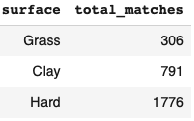

---



Best country : 

#Answer
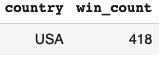



---


Player(s) that disputed the most games : 

#Answer
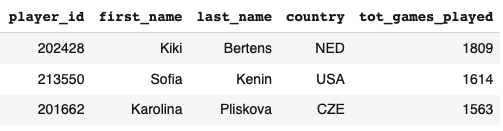



---


Player(s) won the highest number of matches in a row : 

#Answer
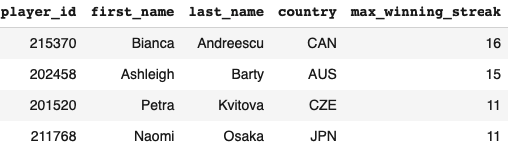

In [ ]:
#@title
#UPGRADE SQL LITE in COLAB
!curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
     /usr/lib/python3.7/lib-dynload/
# then MENU: Runtime > Restart runtime ...

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  8670k      0  0:00:01  0:00:01 --:--:-- 8670k
/content/sqlite
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking for fgrep... /bin/grep -F
checking for ld used by gcc... /usr/bin/ld
checkin

In [ ]:
import sqlite3
sqlite3.sqlite_version

'3.22.0'

In [ ]:
# Prepare Data & Load into SQLite DB
# Copy the files wta_matches.csv, wta_players.csv in the home folder of colab
import sqlite3
import pandas as pd
import re

import re
def calculate_games(score):
  """
  This function formats match scores e.g: 5-7 6-7(5) 6-3(RET) and calculates 
  to the total number of games played in the given match i.e: 34
  """
  score = re.sub(r'\((\d+)\)|RET|W/O', "", score)
  return sum([sum(list(map(int, set_score.split('-')))) \
              for set_score in score.split()])

chunk_size = 1000
print('preparing data load for analysis - primary solution')
conn_v1 = sqlite3.connect('problem_3_v1.db')
print('opened db successfully')
conn_v1.execute('''DROP TABLE IF EXISTS matches_v1;''')
conn_v1.execute('''DROP TABLE IF EXISTS players_v1;''')
conn_v1.execute('''DROP TABLE IF EXISTS games_played_v1;''')

conn_v1.execute('''
CREATE TABLE IF NOT EXISTS matches_v1(tourney_id string
                                    , tourney_name string
                                    , surface string
                                    , tourney_date integer
                                    , match_num integer
                                    , winner_id integer
                                    , loser_id integer
                                    , score string
                                    , games_played integer);''')
conn_v1.execute('''
CREATE TABLE IF NOT EXISTS players_v1(id integer
                                    , first_name string
                                    , last_name string
                                    , country string);''')

match_colnames = ['tourney_id', 'tourney_name', 'surface', 'tourney_date', \
                  'match_num', 'winner_id', 'loser_id', 'score', 'games_played']
for chunk_match_df in pd.read_csv('wta_matches.csv', skiprows=2, header=None
                                  , names=match_colnames, chunksize=chunk_size):
  chunk_match_df['games_played'] = chunk_match_df.apply(
      lambda x: calculate_games(x['score']), axis=1
      )
  chunk_match_df.to_sql('matches_v1', conn_v1, if_exists='append', index=False
                        , chunksize=chunk_size)

player_colnames = ['id', 'first_name', 'last_name', 'country']
for chunk_player_df in pd.read_csv('wta_players.csv', skiprows=2
                                   , header=None, names=player_colnames, chunksize=chunk_size):
  chunk_player_df.to_sql('players_v1', conn_v1, if_exists='append', index=False
                         , chunksize=chunk_size)

conn_v1.close()
print('load success')

preparing data load for analysis - primary solution
opened db successfully
load success


In [ ]:
conn_v1 = sqlite3.connect('problem_3_v1.db')
query__1 = '''
SELECT * FROM matches_v1
'''
df_match = pd.read_sql_query(query__1, conn_v1)
display(df)

query__2 = '''
SELECT * FROM players_v1
'''
df_players = pd.read_sql_query(query__2, conn_v1)
display(df_players)

print("Problem 3.1: How many matches were played by surface (Hard/Clay/Grass ...)?")
print("Problem 3.2: Which country won the highest number of matches?")

,tourney_id,tourney_name,surface,tourney_date,match_num,winner_id,loser_id,score,games_played
0,2019-0300,Luxembourg,Hard,20191014,270,201504,201595,5-7 6-1 6-3,28
1,2019-0300,Luxembourg,Hard,20191014,271,201514,201426,6-3 6-4,19
2,2019-0300,Luxembourg,Hard,20191014,272,201697,211901,6-2 7-6(4),21
3,2019-0300,Luxembourg,Hard,20191014,273,201620,211539,6-1 6-0,13
4,2019-0300,Luxembourg,Hard,20191014,274,214981,203564,6-2 7-6(2),21
...,...,...,...,...,...,...,...,...,...
2868,2019-M035,Washington,Hard,20190729,296,216083,201444,6-4 6-3,19
2869,2019-M035,Washington,Hard,20190729,297,202429,201610,6-3 6-2,17
2870,2019-M035,Washington,Hard,20190729,298,202468,214939,6-3 3-6 6-1,25
2871,2019-M035,Washington,Hard,20190729,299,202429,216083,7-6(5) 6-2,21


,id,first_name,last_name,country
0,200001,Martina,Hingis,SUI
1,200002,Mirjana,Lucic,CRO
2,200003,Justine,Henin,BEL
3,200004,Kerry Anne,Guse,AUS
4,200005,Jolene,Watanabe Giltz,USA
...,...,...,...,...
23301,223312,Asli Yagmur,Kunduk,TUR
23302,223313,Angelina,Mysakova,RUS
23303,223314,Simten,Karaosmanoglu,TUR
23304,223315,Dilara,Sultanova,TKM


In [ ]:
# Provide the code you used, you can use multiple cells and import the libraries you want.
# Solutions for 3.1, 3.2, 3.3 & 3.4 ...
conn_v1 = sqlite3.connect('problem_3_v1.db')
query_01_v1 = '''
SELECT surface, count(distinct match_id_gen) total_matches
FROM (
SELECT 
    surface
    , (tourney_id || match_num) match_id_gen
FROM 
  matches_v1 
GROUP BY
surface, match_id_gen
)
GROUP BY 
  surface
ORDER By 
  total_matches
'''
df_01_v1 = pd.read_sql_query(query_01_v1, conn_v1)
print('---------------------------------------------------------------------\n')
print("Problem 3.1: How many matches were played by surface (Hard/Clay/Grass ...)?")
display(df_01_v1)
print('---------------------------------------------------------------------\n')
print("Problem 3.2: Which country won the highest number of matches?")
# which country won the highest number of matches?
query_02_v1 = '''
SELECT country, count(distinct match_id) win_count from (
SELECT 
    (tourney_id || match_num) match_id, p.country 
FROM 
  matches_v1 as m
INNER JOIN 
  players_v1 as p
ON m.winner_id = p.id
)
GROUP BY country
ORDER BY win_count DESC
LIMIT 1
'''
df_02_v1 = pd.read_sql_query(query_02_v1, conn_v1)
display(df_02_v1)
print('---------------------------------------------------------------------\n')
print('Problem 3.3: Which player(s) disputed the highest number of games?')
print('\tBe careful, in tennis, one match consists of several games')
print('\tFor example, if the score of a match is 6-1 6-3, both players disputed 16 (6+1+6+3) games during that match')
print('\tSometimes score can include a number > 10 (ex: 6-1 3-6 10-8 and both players played 34 games)')
print('\tSometimes, you will find number between parenthesis in the score column, for example 6-1 7-6 (2).')
print('\tNumbers between parenthesis can be ignored. In the example, both players disputed 20 games.')
print('\tSometimes, you will find a score that ends up with "RET".')
print('\tIt means that one of the player abandoned. For example, if the score is 6-1 2-0 RET, both players disputed 9 games.')
query_03_v1 = '''
SELECT player_id, first_name, last_name, country, tot_games_played FROM (
  SELECT player_id
  , tot_games_played
  , DENSE_RANK() OVER win as rank_ FROM (
  SELECT player_id
  , sum(sum_games_played) tot_games_played FROM 
  (
      SELECT 
          winner_id player_id
          , sum(games_played) sum_games_played
      FROM 
        matches_v1 
      GROUP BY winner_id
      UNION ALL 
      SELECT 
      loser_id player_id
      , sum(games_played) sum_games_played
      FROM 
        matches_v1
      GROUP BY loser_id
  )
  GROUP BY player_id
  ORDER BY tot_games_played desc
  )
  WINDOW win AS (ORDER BY tot_games_played desc)
)g 
INNER JOIN
  players_v1 as p
ON 
  p.id = g.player_id
WHERE rank_ <= 3
ORDER BY 
  tot_games_played desc
'''
df_03_v1 = pd.read_sql_query(query_03_v1, conn_v1)
display(df_03_v1)
print('---------------------------------------------------------------------\n')
print('Problem 3.4: Which player(s) won the highest number of matches in a row?')
# Solved using gaps & islands problem
query_04_v1 = '''
SELECT player_id
, first_name
, last_name
, country
, max_winning_streak 
FROM 
(
  SELECT player_id
  , max_winning_streak
  , DENSE_RANK() OVER wind as rank FROM
  (
    SELECT player_id
    , max(r3) max_winning_streak 
    FROM 
    (
      SELECT tourney_date
      , match_id
      , player_id
      , opponent_id
      , win_flag
      , row_number() over (partition by player_id, win_flag, r1-r2 order by match_id) r3
      FROM 
      (
          SELECT tourney_date
          , match_id
          , player_id
          , opponent_id
          , win_flag
          , row_number() over (partition by player_id, win_flag order by match_id) r1
          , row_number() over (partition by player_id order by match_id) r2
          from (
          SELECT 
            (tourney_date || match_num) match_id
            , tourney_date
            , match_num
            , winner_id as player_id
            , loser_id as opponent_id
            , 1 as win_flag
          FROM 
            matches_v1
          UNION ALL
          SELECT 
            (tourney_date || match_num) match_id
            , tourney_date
            , match_num
            , loser_id as player_id
            , winner_id as opponent_id
            , 0 as win_flag
          FROM 
            matches_v1
          )
        ORDER BY 
        player_id, tourney_date, match_num
      )
        ORDER BY 
        player_id, match_id
    ) 
      WHERE win_flag = 1
      GROUP BY player_id
      ORDER BY max_winning_streak desc
  )
  WINDOW wind as (order by max_winning_streak desc)
)b INNER JOIN players_v1 p on p.id = b.player_id
WHERE rank <= 3
ORDER BY max_winning_streak desc
'''
df_04_v1 = pd.read_sql_query(query_04_v1, conn_v1)
display(df_04_v1)
conn_v1.close()

---------------------------------------------------------------------

Problem 3.1: How many matches were played by surface (Hard/Clay/Grass ...)?


,surface,total_matches
0,Grass,306
1,Clay,791
2,Hard,1776


---------------------------------------------------------------------

Problem 3.2: Which country won the highest number of matches?


,country,win_count
0,USA,418


---------------------------------------------------------------------

Problem 3.3: Which player(s) disputed the highest number of games?
	Be careful, in tennis, one match consists of several games
	For example, if the score of a match is 6-1 6-3, both players disputed 16 (6+1+6+3) games during that match
	Sometimes score can include a number > 10 (ex: 6-1 3-6 10-8 and both players played 34 games)
	Sometimes, you will find number between parenthesis in the score column, for example 6-1 7-6 (2).
	Numbers between parenthesis can be ignored. In the example, both players disputed 20 games.
	Sometimes, you will find a score that ends up with "RET".
	It means that one of the player abandoned. For example, if the score is 6-1 2-0 RET, both players disputed 9 games.


,player_id,first_name,last_name,country,tot_games_played
0,202428,Kiki,Bertens,NED,1809
1,213550,Sofia,Kenin,USA,1614
2,201662,Karolina,Pliskova,CZE,1563


---------------------------------------------------------------------

Problem 3.4: Which player(s) won the highest number of matches in a row?


,player_id,first_name,last_name,country,max_winning_streak
0,215370,Bianca,Andreescu,CAN,16
1,202458,Ashleigh,Barty,AUS,15
2,201520,Petra,Kvitova,CZE,11
3,211768,Naomi,Osaka,JPN,11


In [ ]:
# Pandas Solutions to verify/validate results
import re
import numpy as np

def calculate_games_v2(score):
  """
  This function formats match scores e.g: 5-7 6-7(5) 6-3(RET) and calculates 
  to the total number of games played in the given match i.e: 34
  """
  score = re.sub(r'\((\d+)\)|RET|W/O', "", score)
  return sum([sum(list(map(int, set_score.split('-')))) \
              for set_score in score.split()])

match_colnames_v2 = ['tourney_id', 'tourney_name', 'surface', 'tourney_date', \
                  'match_num', 'winner_id', 'loser_id', 'score']
df_match_v2 = pd.read_csv('wta_matches.csv', skiprows=2, header=None, names=match_colnames_v2)
df_match_v2['games_played'] = df_match_v2.apply(
      lambda x: calculate_games_v2(x['score']), axis=1
      )

player_colnames_v2 = ['id', 'first_name', 'last_name', 'country']
df_player_v2 = pd.read_csv('wta_players.csv', skiprows=2, header=None, names=player_colnames_v2)
print('\nsolution 3.1--------------------------------------------------------')
#3.1 pandas solution
print(df_match_v2.groupby(['surface'])['surface'].count())

#3.2 pandas solution
print('\nsolution 3.2---------------------------------------------------------')
print(pd.merge(df_match_v2[['winner_id']],
         df_player_v2[['id', 'country']],
         left_on='winner_id',
         right_on='id',
         how='inner'
)[['id', 'country']].groupby(['country']).agg(
    count_col=pd.NamedAgg('id', aggfunc='count')
)['count_col'].nlargest(1)
)

print('\nsolution 3.3---------------------------------------------------------')
#3.3 pandas solution
df_match_merged = pd.concat(
[df_match_v2.groupby(['winner_id']).agg({'games_played': 'sum'}), 
df_match_v2.groupby(['loser_id']).agg({'games_played': 'sum'})])
print(df_match_merged.groupby(level=-1).agg({'games_played': 'sum'})['games_played'].nlargest(3))

print('\nsolution 3.4---------------------------------------------------------')
generate_sort_id = lambda x: '{}-{}'.format(x.tourney_date, x.match_num)
df_match_v2_win = df_match_v2[['tourney_id','tourney_date',
                               'match_num', 'winner_id']].rename(columns={'winner_id': 'player_id'})
df_match_v2_win['is_win'] = 1
df_match_v2_win['match_id_gen'] = df_match_v2_win.apply(generate_sort_id, axis = 1)
df_match_v2_lose = df_match_v2[['tourney_id', 'tourney_date', 'match_num', 'loser_id']].rename(columns={'loser_id': 'player_id'})
df_match_v2_lose['is_win'] = 0
df_match_v2_lose['match_id_gen'] = df_match_v2_lose.apply(generate_sort_id, axis = 1)
df_match_v2_temp = pd.concat([df_match_v2_win, df_match_v2_lose])
df_match_v2_temp.sort_values(['player_id', 'match_id_gen'], inplace=True)
df_match_v2_temp['streak'] = df_match_v2_temp['is_win'].groupby((df_match_v2_temp['is_win'] != df_match_v2_temp['is_win'].shift()).cumsum()).cumcount()+1
print(df_match_v2_temp.loc[(df_match_v2_temp['is_win'] == 1)].groupby(['player_id', 'is_win']).agg({'streak': 'max'})['streak'].nlargest(5))


solution 3.1--------------------------------------------------------
surface
Clay      791
Grass     306
Hard     1776
Name: surface, dtype: int64

solution 3.2---------------------------------------------------------
country
USA    418
Name: count_col, dtype: int64

solution 3.3---------------------------------------------------------
202428    1809
213550    1614
201662    1563
Name: games_played, dtype: int64

solution 3.4---------------------------------------------------------
player_id  is_win
215370     1         16
202458     1         15
201520     1         11
211768     1         11
201662     1         10
Name: streak, dtype: int64


In [ ]:
# Alternative Solutions / Data Explorations to validate result for 3.1, 3.2, 3.3 & 3.4
import sqlite3
import pandas as pd

print('preparing data load for analysis')
conn = sqlite3.connect('test.db')
print('opened db successfully')
conn.execute('''DROP TABLE IF EXISTS matches;''')
conn.execute('''DROP TABLE IF EXISTS players;''')
conn.execute('''DROP TABLE IF EXISTS games_played;''')

conn.execute('''
CREATE TABLE IF NOT EXISTS matches(tourney_id string
                                    , tourney_name string
                                    , surface string
                                    , tourney_date integer
                                    , match_num integer
                                    , winner_id integer
                                    , loser_id integer
                                    , score string);''')
conn.execute('''
CREATE TABLE IF NOT EXISTS players(id integer
                                    , first_name string
                                    , last_name string
                                    , country string);''')

match_colnames = ['tourney_id', 'tourney_name', 'surface', 'tourney_date', \
                  'match_num', 'winner_id', 'loser_id', 'score']
df_match = pd.read_csv('wta_matches.csv', skiprows=2, header=None, names=match_colnames)

player_colnames = ['id', 'first_name', 'last_name', 'country']
df_player = pd.read_csv('wta_players.csv', skiprows=2, header=None, names=player_colnames)

df_player.to_sql('players', conn, if_exists='replace', index=False, chunksize=10000)
df_match.to_sql('matches', conn, if_exists='replace', index=False, chunksize=10000)

conn.close()

print('load success')

display(df_player.head())
print('\n')
display(df_match.head())



preparing data load for analysis
opened db successfully
load success


,id,first_name,last_name,country
0,200001,Martina,Hingis,SUI
1,200002,Mirjana,Lucic,CRO
2,200003,Justine,Henin,BEL
3,200004,Kerry Anne,Guse,AUS
4,200005,Jolene,Watanabe Giltz,USA


,tourney_id,tourney_name,surface,tourney_date,match_num,winner_id,loser_id,score
0,2019-0300,Luxembourg,Hard,20191014,270,201504,201595,5-7 6-1 6-3
1,2019-0300,Luxembourg,Hard,20191014,271,201514,201426,6-3 6-4
2,2019-0300,Luxembourg,Hard,20191014,272,201697,211901,6-2 7-6(4)
3,2019-0300,Luxembourg,Hard,20191014,273,201620,211539,6-1 6-0
4,2019-0300,Luxembourg,Hard,20191014,274,214981,203564,6-2 7-6(2)


In [ ]:
# How many matches were played by surface (Hard/Clay/Grass ...)
conn = sqlite3.connect('test.db')
query_01 = '''
SELECT surface, count(distinct match_id_gen) total_matches
FROM (
SELECT 
    surface
    , (tourney_id || match_num) match_id_gen
FROM 
  matches 
GROUP BY
surface, match_id_gen
)
GROUP BY 
  surface
ORDER BY 
  total_matches desc
'''
df_01 = pd.read_sql_query(query_01, conn)
display(df_01)
conn.close()

,surface,total_matches
0,Hard,1776
1,Clay,791
2,Grass,306


In [ ]:
# which country won the highest number of matches?
conn = sqlite3.connect('test.db')
query_02 = '''
SELECT country, count(distinct match_id) win_count from (
SELECT 
    (tourney_id || match_num) match_id, p.country 
FROM 
  matches as m
INNER JOIN 
  players as p
ON m.winner_id = p.id
)
GROUP BY country
ORDER BY win_count DESC
LIMIT 1
'''
df_02 = pd.read_sql_query(query_02, conn)
display(df_02)
conn.close()

,country,win_count
0,USA,418


In [ ]:
# Which player(s) disputed the highest number of games
# Be careful, in tennis, one match consists of several games
# For example, if the score of a match is 6-1 6-3, both players disputed 16 (6+1+6+3) games during that match
# Sometimes score can include a number > 10 (ex: 6-1 3-6 10-8 and both players played 34 games)
# Sometimes, you will find number between parenthesis in the score column, for example 6-1 7-6 (2). 
# Numbers between parenthesis can be ignored. In the example, both players disputed 20 games.
# Sometimes, you will find a score that ends up with "RET". 
# It means that one of the player abandoned. For example, if the score is 6-1 2-0 RET, both players disputed 9 games.
conn = sqlite3.connect('test.db')
chunk_size = 100000


query_03 = '''
SELECT 
  (tourney_id || match_num) match_id
  , winner_id player_id
  , score
FROM 
  matches
UNION ALL
SELECT 
  (tourney_id || match_num) match_id
  , loser_id player_id
  , score
FROM 
  matches
'''

def calculate_games(score):
  """
  This function expects match scores format e.g: 5-7 6-1 6-3 and calculates 
  to the total number of games played in the given match i.e: 28
  """
  return sum([sum(list(map(int, set_score.split('-')))) \
              for set_score in score.split()])

for chunk_df in pd.read_sql_query(query_03, conn, chunksize=chunk_size):
  # clean-up / pre process the score field into score_gen field
  chunk_df['score_gen'] = chunk_df['score'].str.replace(
      r'\((\d+)\)|RET|W/O',''
      ).astype('string')
  # run the custom function to calculate the total amount of games played 
  chunk_df['games_played'] = chunk_df.apply(
      lambda x: calculate_games(x['score_gen']), axis=1
      )
  # calculate the sum of games by player_id
  df_games_played = chunk_df.groupby(['player_id']).agg(
      {'games_played': 'sum'}).sort_values(by='games_played', ascending=False)
  # final calculated materialized view to write into sqlite
  df_games_played.to_sql(
      'games_played', conn, if_exists='append', index=True, chunksize=chunk_size
      )


query_03_final = '''
SELECT 
  p.id, p.first_Name, p.last_Name, p.country, g.games_played
FROM 
  games_played as g
INNER JOIN
  players as p
ON 
  p.id = g.player_id
ORDER BY 
  games_played desc
LIMIT 3
'''
df_03_final = pd.read_sql_query(query_03_final, conn)
display(df_03_final)
conn.close()

,id,first_name,last_name,country,games_played
0,202428,Kiki,Bertens,NED,1809
1,213550,Sofia,Kenin,USA,1614
2,201662,Karolina,Pliskova,CZE,1563


In [ ]:
# Which player(s) won the highest number of matches in a row
# Solved using gaps & islands problem
conn = sqlite3.connect('test.db')

query_04 = '''
SELECT player_id
, first_name
, last_name
, country
, max_winning_streak 
FROM 
(
  SELECT player_id
  , max_winning_streak
  , DENSE_RANK() OVER wind as rank FROM
  (
    SELECT player_id
    , max(r3) max_winning_streak 
    FROM 
    (
      SELECT tourney_date
      , match_id
      , player_id
      , opponent_id
      , win_flag
      , row_number() over (partition by player_id, win_flag, r1-r2 order by match_id) r3
      FROM 
      (
          SELECT tourney_date
          , match_id
          , player_id
          , opponent_id
          , win_flag
          , row_number() over (partition by player_id, win_flag order by match_id) r1
          , row_number() over (partition by player_id order by match_id) r2
          from (
          SELECT 
            (tourney_date || match_num) match_id
            , tourney_date
            , match_num
            , winner_id as player_id
            , loser_id as opponent_id
            , 1 as win_flag
          FROM 
            matches
          UNION ALL
          SELECT 
            (tourney_date || match_num) match_id
            , tourney_date
            , match_num
            , loser_id as player_id
            , winner_id as opponent_id
            , 0 as win_flag
          FROM 
            matches
          )
        ORDER BY 
        player_id, tourney_date, match_num
      )
        ORDER BY 
        player_id, match_id
    ) 
      WHERE win_flag = 1
      GROUP BY player_id
      ORDER BY max_winning_streak desc
  )
  WINDOW wind as (order by max_winning_streak desc)
)b INNER JOIN players p on p.id = b.player_id
WHERE rank <= 3
ORDER BY max_winning_streak desc
'''
df_04 = pd.read_sql_query(query_04, conn)
display(df_04)
conn.close()

,player_id,first_name,last_name,country,max_winning_streak
0,215370,Bianca,Andreescu,CAN,16
1,202458,Ashleigh,Barty,AUS,15
2,201520,Petra,Kvitova,CZE,11
3,211768,Naomi,Osaka,JPN,11


In [ ]:
# Provide the code you used, you can use multiple cells and import the libraries you want.
# Pandas Solutions
import re
import numpy as np

def calculate_games_v2(score):
  """
  This function formats match scores e.g: 5-7 6-7(5) 6-3(RET) and calculates 
  to the total number of games played in the given match i.e: 34
  """
  score = re.sub(r'\((\d+)\)|RET|W/O', "", score)
  return sum([sum(list(map(int, set_score.split('-')))) \
              for set_score in score.split()])

match_colnames_v2 = ['tourney_id', 'tourney_name', 'surface', 'tourney_date', \
                  'match_num', 'winner_id', 'loser_id', 'score']
df_match_v2 = pd.read_csv('wta_matches.csv', skiprows=2, header=None, names=match_colnames_v2)
df_match_v2['games_played'] = df_match_v2.apply(
      lambda x: calculate_games_v2(x['score']), axis=1
      )

player_colnames_v2 = ['id', 'first_name', 'last_name', 'country']
df_player_v2 = pd.read_csv('wta_players.csv', skiprows=2, header=None, names=player_colnames_v2)

In [ ]:
#3.1 pandas solution
print(df_match_v2.groupby(['surface'])['surface'].count())

surface
Clay      791
Grass     306
Hard     1776
Name: surface, dtype: int64


In [ ]:
#3.2 pandas solution
pd.merge(df_match_v2[['winner_id']],
         df_player_v2[['id', 'country']],
         left_on='winner_id',
         right_on='id',
         how='inner'
)[['id', 'country']].groupby(['country']).agg(
    count_col=pd.NamedAgg('id', aggfunc='count')
)['count_col'].nlargest(1)

country
USA    418
Name: count_col, dtype: int64

In [ ]:
#3.3 pandas solution
df_match_merged = pd.concat(
[df_match_v2.groupby(['winner_id']).agg({'games_played': 'sum'}), 
df_match_v2.groupby(['loser_id']).agg({'games_played': 'sum'})])
df_match_merged.groupby(level=-1).agg({'games_played': 'sum'})['games_played'].nlargest(3)

202428    1809
213550    1614
201662    1563
Name: games_played, dtype: int64

In [ ]:
display(df_match_v2)

,tourney_id,tourney_name,surface,tourney_date,match_num,winner_id,loser_id,score,games_played
0,2019-0300,Luxembourg,Hard,20191014,270,201504,201595,5-7 6-1 6-3,28
1,2019-0300,Luxembourg,Hard,20191014,271,201514,201426,6-3 6-4,19
2,2019-0300,Luxembourg,Hard,20191014,272,201697,211901,6-2 7-6(4),21
3,2019-0300,Luxembourg,Hard,20191014,273,201620,211539,6-1 6-0,13
4,2019-0300,Luxembourg,Hard,20191014,274,214981,203564,6-2 7-6(2),21
...,...,...,...,...,...,...,...,...,...
2868,2019-M035,Washington,Hard,20190729,296,216083,201444,6-4 6-3,19
2869,2019-M035,Washington,Hard,20190729,297,202429,201610,6-3 6-2,17
2870,2019-M035,Washington,Hard,20190729,298,202468,214939,6-3 3-6 6-1,25
2871,2019-M035,Washington,Hard,20190729,299,202429,216083,7-6(5) 6-2,21


In [ ]:
import numpy as np
generate_sort_id = lambda x: '{}-{}'.format(x.tourney_date, x.match_num)
df_match_v2_win = df_match_v2[['tourney_id','tourney_date',
                               'match_num', 'winner_id']].rename(columns={'winner_id': 'player_id'})
df_match_v2_win['is_win'] = 1
df_match_v2_win['match_id_gen'] = df_match_v2_win.apply(generate_sort_id, axis = 1)
df_match_v2_lose = df_match_v2[['tourney_id', 'tourney_date', 'match_num', 'loser_id']].rename(columns={'loser_id': 'player_id'})
df_match_v2_lose['is_win'] = 0
df_match_v2_lose['match_id_gen'] = df_match_v2_lose.apply(generate_sort_id, axis = 1)
df_match_v2_temp = pd.concat([df_match_v2_win, df_match_v2_lose])
df_match_v2_temp.sort_values(['player_id', 'match_id_gen'], inplace=True)
df_match_v2_temp['streak'] = df_match_v2_temp['is_win'].groupby((df_match_v2_temp['is_win'] != df_match_v2_temp['is_win'].shift()).cumsum()).cumcount()+1
display(df_match_v2_temp)
df_match_v2_temp.loc[(df_match_v2_temp['is_win'] == 1)].groupby(['player_id', 'is_win']).agg({'streak': 'max'})['streak'].nlargest(5)

,tourney_id,tourney_date,match_num,player_id,is_win,match_id_gen,streak
2098,2019-580,20190114,107,200033,1,20190114-107,1
2158,2019-580,20190114,167,200033,1,20190114-167,2
2188,2019-580,20190114,197,200033,1,20190114-197,3
2203,2019-580,20190114,212,200033,1,20190114-212,4
2211,2019-580,20190114,220,200033,0,20190114-220,1
...,...,...,...,...,...,...,...
153,2019-0528,20191007,300,221103,1,20191007-300,5
7,2019-0300,20191014,278,221103,0,20191014-278,1
1732,2019-520,20190527,2123,221911,0,20190527-2123,2
758,2019-1059,20191111,276,222390,1,20191111-276,1


player_id  is_win
215370     1         16
202458     1         15
201520     1         11
211768     1         11
201662     1         10
Name: streak, dtype: int64